In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from pathlib import Path

In [2]:
current_dir = Path("./").resolve()
csvs_location = Path(str(current_dir) + "/csvs").resolve()
csv_id = 4

withRL = pd.read_csv(str(Path(str(csvs_location) + f"/log-output-rl-id_{csv_id}.csv").resolve()), sep=';')
withRL = withRL.iloc[:,[-3,-4]]


In [3]:
withRL['SD'] = 0


In [4]:
withRL.head()

,interval_nVehSeen,interval_nVehLeft,SD
0,4,0,0
1,3,2,0
2,2,2,0
3,5,1,0
4,4,3,0


In [5]:
 for i in range(int(len(withRL.loc[:,"interval_nVehSeen"])/12)):
    temp = withRL['interval_nVehSeen'][i*12:(i*12)+12]
    withRL['SD'][i]=np.std(temp)
#     /np.mean(temp)
    

In [6]:
withRL['leftPercentage'] = 0

In [7]:
 for j in range(int(len(withRL.loc[:,"interval_nVehSeen"])/12)):
    seen = np.sum(withRL['interval_nVehSeen'][j*12:(j*12)+12])
    left = np.sum(withRL['interval_nVehLeft'][j*12:(j*12)+12])
    withRL['leftPercentage'][j]=left/seen


/tmp/ipykernel_25260/3616633080.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  withRL['leftPercentage'][j]=left/seen


In [8]:
withRL= withRL.iloc[:int(len(withRL.loc[:,"leftPercentage"])/12),[-1,-2]]

In [9]:
for j in range(int(len(withRL.loc[:,"leftPercentage"])/12)):
    withRL['leftPercentage'][j]=(left/seen)


In [10]:
tempSD=withRL["SD"]
withRL["SD"] = tempSD[1:]
withRL = withRL.loc[1:,:]
withRL

,leftPercentage,SD
1,0.454545,2.677063
2,0.454545,2.778889
3,0.454545,3.041381
4,0.454545,2.702879
5,0.454545,3.122499
...,...,...
1246,0.453125,2.867442
1247,0.440678,2.596739
1248,0.569444,3.674235
1249,0.472727,2.628635


In [11]:
withRL = withRL.groupby(by="SD",level = None).mean().reset_index()
print(withRL.head())

         SD  leftPercentage
0  1.907587        0.467742
1  2.034426        0.431034
2  2.192158        0.425195
3  2.198484        0.450000
4  2.203217        0.492063


Text(0, 0.5, 'leftPercentage')

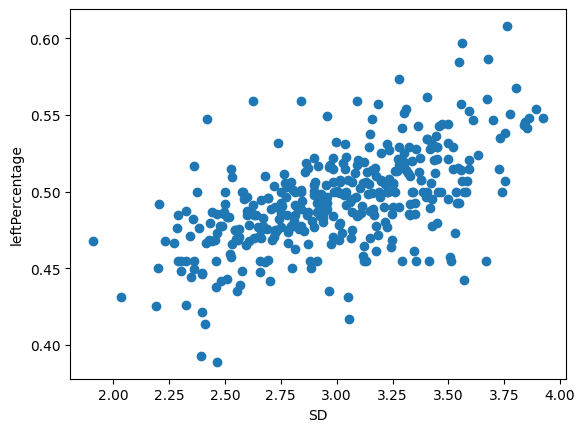

In [12]:
plt.scatter(withRL['SD'],withRL['leftPercentage'])
plt.xlabel('SD')
plt.ylabel('leftPercentage')

In [13]:
# withoutRL = pd.read_csv("./log-output-no-rl-1668660110.735033.csv",sep=';')

current_dir = Path("./").resolve()
csvs_location = Path(str(current_dir) + "/csvs").resolve()
csv_id = 4

withoutRL = pd.read_csv(str(Path(str(csvs_location) + f"/log-output-no-rl-id_{csv_id}.csv").resolve()), sep=';')

In [14]:
withoutRL['SD'] = 0


In [15]:
 for i in range(int(len(withoutRL.loc[:,"interval_nVehSeen"])/12)):
    temp = withoutRL['interval_nVehSeen'][i*12:(i*12)+12]
    withoutRL['SD'][i]=np.std(temp)
#     /np.mean(temp)
    

/tmp/ipykernel_25260/4242772586.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  withoutRL['SD'][i]=np.std(temp)


In [16]:
withoutRL['leftPercentage'] = 0

In [17]:
 for j in range(int(len(withoutRL.loc[:,"interval_nVehSeen"])/12)):
    seen = np.sum(withoutRL['interval_nVehSeen'][j*12:(j*12)+12])
    left = np.sum(withoutRL['interval_nVehLeft'][j*12:(j*12)+12])
    withoutRL['leftPercentage'][j]=(left/seen)


/tmp/ipykernel_25260/3186921145.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  withoutRL['leftPercentage'][j]=(left/seen)


In [18]:
withoutRL= withoutRL.iloc[:int(len(withoutRL.loc[:,"leftPercentage"])/12),[-1,-2]]

In [19]:
for j in range(int(len(withoutRL.loc[:,"leftPercentage"])/12)):
    withoutRL['leftPercentage'][j]=left/seen


In [20]:
tempSD=withoutRL["SD"]
withoutRL["SD"] = tempSD[1:]
withoutRL = withoutRL.loc[1:,:]
withoutRL

,leftPercentage,SD
1,0.473684,2.677063
2,0.473684,2.778889
3,0.473684,2.861381
4,0.473684,2.763854
5,0.473684,3.226410
...,...,...
1245,0.430769,3.094574
1246,0.469697,3.068659
1247,0.440678,2.325881
1248,0.542857,3.362374


In [21]:
withoutRL = withoutRL.groupby(by="SD",level = None).mean().reset_index()
print(withoutRL)

           SD  leftPercentage
0    2.041241        0.433333
1    2.094968        0.410714
2    2.139250        0.454545
3    2.177856        0.459919
4    2.215789        0.457627
..        ...             ...
349  3.861311        0.533001
350  3.882833        0.558442
351  3.901567        0.544118
352  3.947573        0.473684
353  3.960745        0.558272

[354 rows x 2 columns]


Text(0, 0.5, 'leftPercentage')

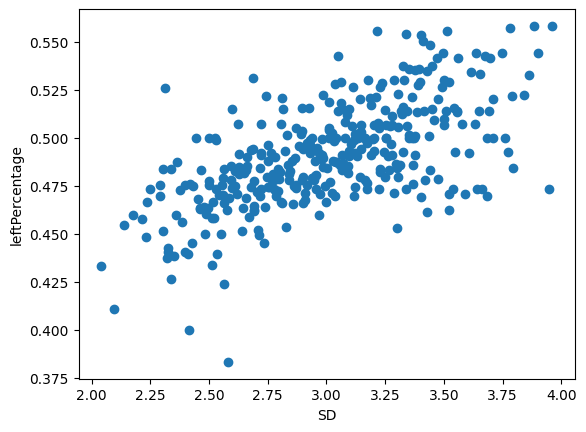

In [22]:
plt.scatter(withoutRL['SD'],withoutRL['leftPercentage'])
plt.xlabel('SD')
plt.ylabel('leftPercentage')

In [23]:
# mwithRL,bwithRL = np.polyfit(withRL['SD'],withRL['leftPercentage'],1)
# mwithoutRL,bwithoutRL = np.polyfit(withoutRL['SD'],withoutRL['leftPercentage'],1)

rl_poly = np.polynomial.Polynomial.fit(withRL['SD'], withRL['leftPercentage'], 4)
norl_poly = np.polynomial.Polynomial.fit(withoutRL['SD'], withoutRL['leftPercentage'], 4)

print(rl_poly)
print(norl_poly)

aWithRL, bWithRL, cWithRL, dWithRL, eWithRL= rl_poly.coef
aWithoutRL, bWithoutRL, cWithoutRL, dWithoutRL, eWithoutRL= norl_poly.coef

print(rl_poly.coef)
print(norl_poly.coef)

0.49206465375263025 + 0.04091697615751264·x¹ - 0.024618482158361977·x² +
0.013654670510258798·x³ + 0.04098815997150395·x⁴
0.49305693940246265 + 0.0413277238859666·x¹ - 0.015655006580693815·x² -
0.00018496421421156046·x³ + 0.007367777433760768·x⁴
[ 0.49206465  0.04091698 -0.02461848  0.01365467  0.04098816]
[ 4.93056939e-01  4.13277239e-02 -1.56550066e-02 -1.84964214e-04
  7.36777743e-03]


Ploting all the necessary graph to compare

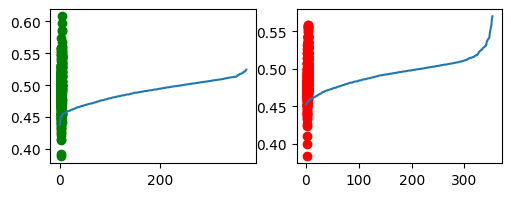

In [24]:
plt.figure(figsize=(9,2))
plt.subplot(131)
plt.scatter(withRL['SD'],withRL['leftPercentage'],color="g")

sd_values_withRL = withRL['SD']
plt.plot(norl_poly(sd_values_withRL))

plt.subplot(132)
plt.scatter(withoutRL['SD'],withoutRL['leftPercentage'],color="r")

sd_values_withoutRL = withoutRL['SD']
plt.plot(rl_poly(sd_values_withoutRL))



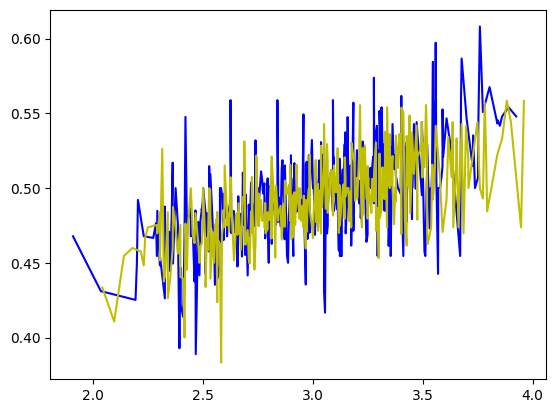

In [25]:
plt.plot(withRL['SD'], withRL['leftPercentage'], color='b')
plt.plot(withoutRL['SD'], withoutRL['leftPercentage'], color='y')

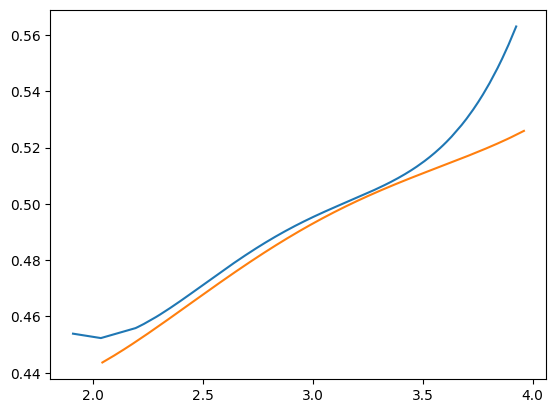

In [26]:
plt.plot(withRL['SD'], rl_poly(sd_values_withRL))
plt.plot(withoutRL['SD'], norl_poly(sd_values_withoutRL))